In [1]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("house_prices_dataset.csv")
print("Original Data : \n",dataset)

Original Data : 
     Housesize(sqft)  No.of_Room  Age_House(year)  Distance(miles)  Price
0              1200           3               10                5    250
1              1500           4                5               10    300
2               900           2               20                2    200
3              1700           4                7               15    350
4               850           2               30                8    150
5              2000           5                3               12    450
6              1350           3                8                7    275
7              2200           5                2               20    500
8              1750           4                6               13    325
9              1650           4               15                9    340
10              950           3               25                3    180
11             1900           5                4               18    425
12             1800           4  

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print("X Part : \n",x)
print("Y Part : \n",y)

X Part : 
 [[1200    3   10    5]
 [1500    4    5   10]
 [ 900    2   20    2]
 [1700    4    7   15]
 [ 850    2   30    8]
 [2000    5    3   12]
 [1350    3    8    7]
 [2200    5    2   20]
 [1750    4    6   13]
 [1650    4   15    9]
 [ 950    3   25    3]
 [1900    5    4   18]
 [1800    4    9   11]
 [1100    3   18    6]
 [1550    4   12   14]
 [1950    5    1   17]
 [1850    4    6   10]
 [1050    3   22    8]
 [1450    4   14    7]
 [2100    5    3   16]]
Y Part : 
 [250 300 200 350 150 450 275 500 325 340 180 425 390 220 310 470 410 230
 290 490]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("x_train_scaled : \n",x_train_scaled)
print("x_test_scaled : \n",x_test_scaled)

x_train_scaled : 
 [[ 0.43370623  0.19738551 -0.66421645  0.46282554]
 [ 1.03192173  1.25010822 -1.03494191  0.26268477]
 [ 0.79263553  1.25010822 -0.91136675  1.46352941]
 [ 0.31406313  0.19738551 -0.54064129  0.86310709]
 [-0.28415236  0.19738551  0.32438478 -0.7380191 ]
 [ 0.67299243  0.19738551 -0.66421645 -0.13759678]
 [-1.12165405 -0.8553372   0.81868539 -0.93815988]
 [-1.60022644 -1.90805992  1.06583569 -1.73872297]
 [ 0.19442004  0.19738551  0.44795993 -0.33773756]
 [ 1.27120792  1.25010822 -1.03494191  1.06324786]
 [-1.71986954 -1.90805992  2.30158722 -0.53787833]
 [ 0.55334933  0.19738551 -0.29349099  0.06254399]
 [ 1.51049412  1.25010822 -1.15851706  1.86381095]
 [-1.48058334 -0.8553372   1.68371146 -1.5385822 ]
 [-0.04486616  0.19738551  0.07723447  0.66296631]
 [-0.52343856 -0.8553372  -0.41706614 -0.7380191 ]]
x_test_scaled : 
 [[-0.88236785 -0.8553372  -0.16991584 -1.13830065]
 [-1.24129715 -0.8553372   1.312986   -0.53787833]
 [ 0.91227863  1.25010822 -1.28209221  1.263

In [16]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr_model.fit(x_train_scaled, y_train)
y_pred = svr_model.predict(x_test_scaled)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8755.151377610207
R-squared: 0.01834322325323534


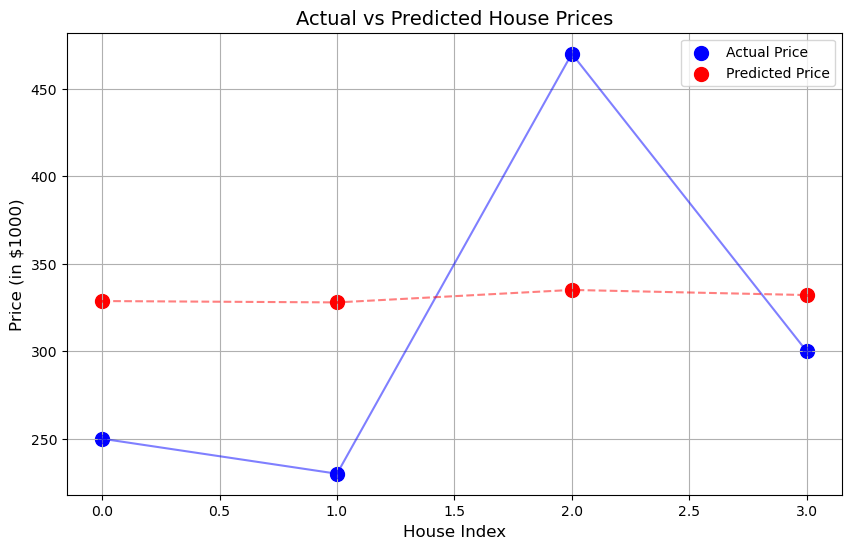

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Scatter plot for Actual and Predicted Prices
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Price', s=100)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Price', s=100)
# Line connecting Actual Prices
plt.plot(range(len(y_test)), y_test, color='blue', linestyle='-', marker='o', alpha=0.5)
# Line connecting Predicted Prices
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='--', marker='x', alpha=0.5)
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.xlabel('House Index', fontsize=12)
plt.ylabel('Price (in $1000)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()